Spring 2022
<img src="https://www.cuipcairo.org/sites/default/files/styles/medium/public/49658177_2020840098011471_2893445443553853440_n.png?itok=672tzxcF"
 width="80px" align="right">

CIE 555, Neural Networks and Deep Learning

University of Science and Technology, Zewail City

<br>

<h1 align="center">Eye closed/ opened detection Training Model </h3>

---

# Dataset 1: 
https://www.kaggle.com/datasets/serenaraju/yawn-eye-dataset-new





In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1zX7tiBdckgvyXUow0sMKNY5y8h_mtu11'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('train.zip')

unzip the file into an appropriately named folder.


In [ ]:
!mkdir /content/closed_open
!unzip /content/train.zip -d /content/closed_open

Archive:  /content/train.zip
   creating: /content/closed_open/test/Closed/
  inflating: /content/closed_open/test/Closed/_107.jpg  
  inflating: /content/closed_open/test/Closed/_115.jpg  
  inflating: /content/closed_open/test/Closed/_116.jpg  
  inflating: /content/closed_open/test/Closed/_120.jpg  
  inflating: /content/closed_open/test/Closed/_129.jpg  
  inflating: /content/closed_open/test/Closed/_130.jpg  
  inflating: /content/closed_open/test/Closed/_132.jpg  
  inflating: /content/closed_open/test/Closed/_137.jpg  
  inflating: /content/closed_open/test/Closed/_14.jpg  
  inflating: /content/closed_open/test/Closed/_148.jpg  
  inflating: /content/closed_open/test/Closed/_152.jpg  
  inflating: /content/closed_open/test/Closed/_159.jpg  
  inflating: /content/closed_open/test/Closed/_161.jpg  
  inflating: /content/closed_open/test/Closed/_163.jpg  
  inflating: /content/closed_open/test/Closed/_164.jpg  
  inflating: /content/closed_open/test/Closed/_167.jpg  
  inflating: 

In [ ]:
import os
import random 
from glob import glob
from pathlib import Path
DATASET_DIR = os.path.join("/content", "closed_open")
TRAIN_DIR = os.path.join(DATASET_DIR, "train")
TEST_DIR = os.path.join(DATASET_DIR, "test")

all_data = [y for x in os.walk(DATASET_DIR) for y in glob(os.path.join(x[0], '*jpg'))]
all_labels = [os.path.basename(os.path.dirname(x)) for x in all_data]
print(len(all_data))
all_data[:10]

1452


['/content/closed_open/train/Open/_338.jpg',
 '/content/closed_open/train/Open/_401.jpg',
 '/content/closed_open/train/Open/_708.jpg',
 '/content/closed_open/train/Open/_688.jpg',
 '/content/closed_open/train/Open/_255.jpg',
 '/content/closed_open/train/Open/_511.jpg',
 '/content/closed_open/train/Open/_517.jpg',
 '/content/closed_open/train/Open/_151.jpg',
 '/content/closed_open/train/Open/_153.jpg',
 '/content/closed_open/train/Open/_654.jpg']

In [ ]:
import numpy as np
classes = np.unique(all_labels)
print(' Number of classes are ', len(classes))
print('class labels are :', classes)

 Number of classes are  2
class labels are : ['Closed' 'Open']


 Viewing 25 random samples and their labels from the dataset

(612, 612, 3)
(300, 364, 3)
(300, 412, 3)
(70, 69, 3)
(300, 370, 3)
(224, 225, 3)
(300, 405, 3)
(131, 132, 3)
(300, 381, 3)
(176, 177, 3)
(300, 419, 3)
(300, 303, 3)
(68, 71, 3)
(300, 342, 3)
(67, 75, 3)
(128, 118, 3)
(393, 300, 3)
(224, 261, 3)
(300, 341, 3)
(160, 170, 3)
(310, 294, 3)
(162, 247, 3)
(300, 481, 3)
(509, 452, 3)
(300, 300, 3)


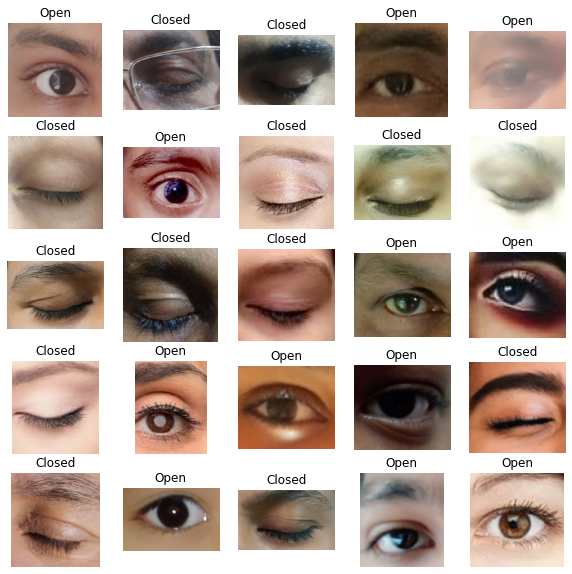

In [ ]:
#5
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

# Sample 25 images from dataset
indices = np.random.randint(0, len(all_data), size=25)
images = [all_data[i] for i in indices]
labels = [all_labels[i] for i in indices]
# Plot the 25 images
plt.figure(figsize=(10,10))
for i in range(len(indices)):
    plt.subplot(5, 5, i + 1)
    image = mpimg.imread(images[i]) # Read image from disk
    plt.imshow(image)
    # print(image.shape)
    plt.title(labels[i])
    plt.axis('off')
    
plt.show()

## Model 1 vgg16

In [ ]:
#6
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

BATCH_SIZE = 64
HEIGHT = 100
WIDTH = 100
VAL_SPLIT = 0.2

# 1. Construct an instance of the `ImageDataGenerator` class
train_datagen =  ImageDataGenerator(
      preprocessing_function = tf.keras.applications.vgg16.preprocess_input,
      validation_split = VAL_SPLIT,
      rescale = 1.0/255,
      rotation_range = 20,
      brightness_range = [0.4 , 1.5 ],
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      vertical_flip = False, # Would vertical_flip = True be a good choice for data augmentation
    )

# 2. Retrieve the iterator
train_generator = train_datagen.flow_from_directory(TRAIN_DIR, 
                                                    shuffle = True,
                                                    seed = 7,
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

Found 988 images belonging to 2 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    shuffle = True,
    seed = 7,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation')


Found 246 images belonging to 2 classes.


In [ ]:
# Do the same steps for the test set

# 1. Construct an instance of the `ImageDataGenerator` class
test_datagen =  ImageDataGenerator(
    preprocessing_function = tf.keras.applications.vgg16.preprocess_input
    )

# 2. Retrieve the iterator
test_generator = test_datagen.flow_from_directory(TEST_DIR, 
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical')

Found 218 images belonging to 2 classes.


In [ ]:
from keras.applications.xception import Xception
from keras.applications.inception_v3 import InceptionV3
from keras.applications.mobilenet_v2  import MobileNetV2
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout

from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout

# Load model without classification head
base_model = VGG16(include_top = False,
                   weights = 'imagenet',
                   input_shape = (HEIGHT, WIDTH, 3))

# Print base model summary
base_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                              

freeze the appropriate number of layers.



In [ ]:
# Mark loaded layers as not trainable
for layer in base_model.layers:
  layer.trainable = False

Add your own output layers, and compile.

In [ ]:
# Add new classifier layers

x = Flatten()(base_model.layers[-1].output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
output = Dense(2, activation='softmax')(x) # 30 classes 

# Define new model
model = Model(inputs = base_model.inputs, outputs = output)

# Print summary
model.summary()

# Compile
base_learning_rate = 0.0001
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = base_learning_rate),
            loss = 'binary_crossentropy',
            metrics = ['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


### Train the model

In [ ]:
import tensorflow as tf

INITIAL_EPOCHS = 15

history = model.fit(train_generator,
                    validation_data = val_generator,
                    epochs = INITIAL_EPOCHS)

Epoch 1/15
16/16 [==============================] - 22s 576ms/step - loss: 0.4273 - accuracy: 0.8350 - val_loss: 0.2803 - val_accuracy: 0.8821
Epoch 2/15
16/16 [==============================] - 7s 466ms/step - loss: 0.2024 - accuracy: 0.9342 - val_loss: 0.1843 - val_accuracy: 0.9187
Epoch 3/15
16/16 [==============================] - 7s 452ms/step - loss: 0.1316 - accuracy: 0.9595 - val_loss: 0.1317 - val_accuracy: 0.9512
Epoch 4/15
16/16 [==============================] - 7s 465ms/step - loss: 0.1156 - accuracy: 0.9626 - val_loss: 0.1118 - val_accuracy: 0.9512
Epoch 5/15
16/16 [==============================] - 7s 450ms/step - loss: 0.0881 - accuracy: 0.9666 - val_loss: 0.1424 - val_accuracy: 0.9553
Epoch 6/15
16/16 [==============================] - 7s 448ms/step - loss: 0.0886 - accuracy: 0.9626 - val_loss: 0.0990 - val_accuracy: 0.9634
Epoch 7/15
16/16 [==============================] - 7s 446ms/step - loss: 0.0792 - accuracy: 0.9717 - val_loss: 0.1154 - val_accuracy: 0.9390
Epoch

### Tuning the model

In [ ]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


In [ ]:
base_model.trainable = True

print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 15

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr = base_learning_rate/10),
            loss='binary_crossentropy',
            metrics=['accuracy'])


Number of layers in the base model:  19


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
for i, layer in enumerate(model.layers):
  print(i, layer.name, layer.trainable)
FINE_TUNE_EPOCHS = 5
TOTAL_EPOCHS = INITIAL_EPOCHS + FINE_TUNE_EPOCHS

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 flatten True
20 dense True
21 dropout True
22 dense_1 True
23 dense_2 True


In [ ]:

history_fine = model.fit(train_generator,
                        validation_data = val_generator,
                        initial_epoch=history.epoch[-1], # specify the initial value of epoch to start from when training
                        epochs = TOTAL_EPOCHS)

Epoch 15/20
16/16 [==============================] - 10s 485ms/step - loss: 0.0395 - accuracy: 0.9848 - val_loss: 0.0967 - val_accuracy: 0.9675
Epoch 16/20
16/16 [==============================] - 7s 452ms/step - loss: 0.0244 - accuracy: 0.9909 - val_loss: 0.0728 - val_accuracy: 0.9797
Epoch 17/20
16/16 [==============================] - 7s 454ms/step - loss: 0.0355 - accuracy: 0.9858 - val_loss: 0.0579 - val_accuracy: 0.9797
Epoch 18/20
16/16 [==============================] - 10s 629ms/step - loss: 0.0297 - accuracy: 0.9868 - val_loss: 0.0380 - val_accuracy: 0.9919
Epoch 19/20
16/16 [==============================] - 7s 450ms/step - loss: 0.0299 - accuracy: 0.9899 - val_loss: 0.0431 - val_accuracy: 0.9919
Epoch 20/20
16/16 [==============================] - 7s 451ms/step - loss: 0.0203 - accuracy: 0.9909 - val_loss: 0.0542 - val_accuracy: 0.9756


In [ ]:
# Saving the Model 
model.save('vgg16_new.h5')

evaluate on the test set 

In [ ]:
model.evaluate(test_generator)

4/4 [==============================] - 1s 368ms/step - loss: 10.5778 - accuracy: 0.8028


[10.57784652709961, 0.8027523159980774]

## Model 2 vgg16

In [ ]:
#6

from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

BATCH_SIZE = 64
HEIGHT = 100
WIDTH = 100
VAL_SPLIT = 0.2

# 1. Construct an instance of the `ImageDataGenerator` class
train_datagen =  ImageDataGenerator(
      preprocessing_function = tf.keras.applications.vgg16.preprocess_input,
      validation_split = VAL_SPLIT,
      rescale = 1.0/255,
      rotation_range = 20,
      brightness_range = [0.4 , 1.5 ],
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      vertical_flip = False, # Would vertical_flip = True be a good choice for data augmentation
    )

# 2. Retrieve the iterator
train_generator = train_datagen.flow_from_directory(TRAIN_DIR, 
                                                    shuffle = True,
                                                    seed = 7,
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

Found 988 images belonging to 2 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    shuffle = True,
    seed = 7,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation')


Found 246 images belonging to 2 classes.


In [ ]:
# Do the same steps for the test set

# 1. Construct an instance of the `ImageDataGenerator` class
test_datagen =  ImageDataGenerator(
    preprocessing_function = tf.keras.applications.vgg16.preprocess_input
    )

# 2. Retrieve the iterator
test_generator = test_datagen.flow_from_directory(TEST_DIR, 
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical')

Found 218 images belonging to 2 classes.


In [ ]:
from keras.applications.xception import Xception
from keras.applications.inception_v3 import InceptionV3
from keras.applications.mobilenet_v2  import MobileNetV2
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout

from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout

# Load model without classification head
base_model = VGG16(include_top = False,
                   weights = 'imagenet',
                   input_shape = (HEIGHT, WIDTH, 3))

# Print base model summary
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

freeze the appropriate number of layers.



In [ ]:
# Mark loaded layers as not trainable
for layer in base_model.layers:
  layer.trainable = False

Add your own output layers, and compile.

In [ ]:
# Add new classifier layers

x = Flatten()(base_model.layers[-1].output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
output = Dense(2, activation='softmax')(x) # 30 classes 

# Define new model
model = Model(inputs = base_model.inputs, outputs = output)

# Print summary
model.summary()

# Compile
base_learning_rate = 0.0001
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = base_learning_rate),
            loss = 'binary_crossentropy',
            metrics = ['accuracy'])

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


### Train the model

In [ ]:
import tensorflow as tf

INITIAL_EPOCHS = 15

history = model.fit(train_generator,
                    validation_data = val_generator,
                    epochs = INITIAL_EPOCHS)

Epoch 1/15
16/16 [==============================] - 9s 538ms/step - loss: 0.4586 - accuracy: 0.8198 - val_loss: 0.2954 - val_accuracy: 0.8780
Epoch 2/15
16/16 [==============================] - 8s 500ms/step - loss: 0.2356 - accuracy: 0.9322 - val_loss: 0.1833 - val_accuracy: 0.9228
Epoch 3/15
16/16 [==============================] - 8s 497ms/step - loss: 0.1508 - accuracy: 0.9534 - val_loss: 0.1515 - val_accuracy: 0.9350
Epoch 4/15
16/16 [==============================] - 8s 501ms/step - loss: 0.1210 - accuracy: 0.9656 - val_loss: 0.1477 - val_accuracy: 0.9309
Epoch 5/15
16/16 [==============================] - 8s 505ms/step - loss: 0.1091 - accuracy: 0.9636 - val_loss: 0.1044 - val_accuracy: 0.9593
Epoch 6/15
16/16 [==============================] - 8s 503ms/step - loss: 0.0933 - accuracy: 0.9696 - val_loss: 0.1258 - val_accuracy: 0.9553
Epoch 7/15
16/16 [==============================] - 8s 503ms/step - loss: 0.0735 - accuracy: 0.9706 - val_loss: 0.1315 - val_accuracy: 0.9431
Epoch 

In [ ]:
model.evaluate(test_generator)

4/4 [==============================] - 1s 137ms/step - loss: 10.9433 - accuracy: 0.6789


[10.943331718444824, 0.6788991093635559]

### Tuning the model

In [ ]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_14 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


In [ ]:
base_model.trainable = True

print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 13

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr = base_learning_rate/10),
            loss='binary_crossentropy',
            metrics=['accuracy'])


Number of layers in the base model:  19


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
for i, layer in enumerate(model.layers):
  print(i, layer.name, layer.trainable)
FINE_TUNE_EPOCHS = 5
TOTAL_EPOCHS = INITIAL_EPOCHS + FINE_TUNE_EPOCHS

0 input_14 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 flatten_14 True
20 dense_40 True
21 dropout_12 True
22 dense_41 True
23 dense_42 True


In [ ]:

history_fine = model.fit(train_generator,
                        validation_data = val_generator,
                        initial_epoch=history.epoch[-1], # specify the initial value of epoch to start from when training
                        epochs = TOTAL_EPOCHS)

Epoch 15/20
16/16 [==============================] - 8s 530ms/step - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.1176 - val_accuracy: 0.9797
Epoch 16/20
16/16 [==============================] - 8s 499ms/step - loss: 0.0082 - accuracy: 0.9980 - val_loss: 0.0591 - val_accuracy: 0.9919
Epoch 17/20
16/16 [==============================] - 8s 492ms/step - loss: 0.0034 - accuracy: 0.9980 - val_loss: 0.0772 - val_accuracy: 0.9797
Epoch 18/20
16/16 [==============================] - 8s 490ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0814 - val_accuracy: 0.9797
Epoch 19/20
16/16 [==============================] - 8s 495ms/step - loss: 0.0056 - accuracy: 0.9970 - val_loss: 0.0285 - val_accuracy: 0.9919
Epoch 20/20
16/16 [==============================] - 8s 491ms/step - loss: 5.7378e-04 - accuracy: 1.0000 - val_loss: 0.0358 - val_accuracy: 0.9878


In [ ]:
# Saving the Model 
model.save('vgg16_new.h5')

evaluate on the test set 

In [ ]:
model.evaluate(test_generator)

4/4 [==============================] - 1s 161ms/step - loss: 3.9328 - accuracy: 0.9541


[3.9327943325042725, 0.9541284441947937]

## Model 3 Inception:

In [ ]:
#6
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

BATCH_SIZE = 64
HEIGHT = 100
WIDTH = 100
VAL_SPLIT = 0.2

# 1. Construct an instance of the `ImageDataGenerator` class
train_datagen =  ImageDataGenerator(
      preprocessing_function = tf.keras.applications.inception_v3.preprocess_input,
      validation_split = VAL_SPLIT,
      rescale = 1.0/255,
      rotation_range = 20,
      brightness_range = [0.4 , 1.5 ],
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      vertical_flip = False, # Would vertical_flip = True be a good choice for data augmentation
    )

# 2. Retrieve the iterator
train_generator = train_datagen.flow_from_directory(TRAIN_DIR, 
                                                    shuffle = True,
                                                    seed = 7,
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

Found 988 images belonging to 2 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    shuffle = True,
    seed = 7,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation')


Found 246 images belonging to 2 classes.


In [ ]:
# Do the same steps for the test set

# 1. Construct an instance of the `ImageDataGenerator` class
test_datagen =  ImageDataGenerator(
    preprocessing_function = tf.keras.applications.inception_v3.preprocess_input
    )

# 2. Retrieve the iterator
test_generator = test_datagen.flow_from_directory(TEST_DIR, 
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical')

Found 218 images belonging to 2 classes.


In [ ]:
from keras.applications.xception import Xception
from keras.applications.inception_v3 import InceptionV3
from keras.applications.mobilenet_v2  import MobileNetV2
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout

from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout

# Load model without classification head
base_model = InceptionV3(include_top = False,
                   weights = 'imagenet',
                   input_shape = (HEIGHT, WIDTH, 3))

# Print base model summary
base_model.summary()

87924736/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 49, 49, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                      

freeze the appropriate number of layers.



In [ ]:
# Mark loaded layers as not trainable
for layer in base_model.layers:
  layer.trainable = False

Add your own output layers, and compile.

In [ ]:
# Add new classifier layers

x = Flatten()(base_model.layers[-1].output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
output = Dense(2, activation='softmax')(x) # 30 classes 

# Define new model
model = Model(inputs = base_model.inputs, outputs = output)

# Print summary
model.summary()

# Compile
base_learning_rate = 0.0001
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = base_learning_rate),
            loss = 'binary_crossentropy',
            metrics = ['accuracy'])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 49, 49, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


### Train the model

In [ ]:
import tensorflow as tf

INITIAL_EPOCHS = 15

history = model.fit(train_generator,
                    validation_data = val_generator,
                    epochs = INITIAL_EPOCHS)

Epoch 1/15
16/16 [==============================] - 14s 601ms/step - loss: 0.6808 - accuracy: 0.5941 - val_loss: 0.6202 - val_accuracy: 0.7886
Epoch 2/15
16/16 [==============================] - 7s 425ms/step - loss: 0.6269 - accuracy: 0.6903 - val_loss: 0.5810 - val_accuracy: 0.7846
Epoch 3/15
16/16 [==============================] - 7s 428ms/step - loss: 0.5903 - accuracy: 0.7368 - val_loss: 0.5442 - val_accuracy: 0.7724
Epoch 4/15
16/16 [==============================] - 7s 425ms/step - loss: 0.5481 - accuracy: 0.7571 - val_loss: 0.5145 - val_accuracy: 0.7602
Epoch 5/15
16/16 [==============================] - 7s 425ms/step - loss: 0.5161 - accuracy: 0.7652 - val_loss: 0.4819 - val_accuracy: 0.7764
Epoch 6/15
16/16 [==============================] - 7s 437ms/step - loss: 0.4985 - accuracy: 0.7814 - val_loss: 0.4772 - val_accuracy: 0.7927
Epoch 7/15
16/16 [==============================] - 7s 422ms/step - loss: 0.4776 - accuracy: 0.7895 - val_loss: 0.4351 - val_accuracy: 0.8089
Epoch

### Tuning the model

In [ ]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_2 False
1 conv2d False
2 batch_normalization False
3 activation False
4 conv2d_1 False
5 batch_normalization_1 False
6 activation_1 False
7 conv2d_2 False
8 batch_normalization_2 False
9 activation_2 False
10 max_pooling2d False
11 conv2d_3 False
12 batch_normalization_3 False
13 activation_3 False
14 conv2d_4 False
15 batch_normalization_4 False
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_8 False
19 batch_normalization_8 False
20 activation_8 False
21 conv2d_6 False
22 conv2d_9 False
23 batch_normalization_6 False
24 batch_normalization_9 False
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_5 False
29 conv2d_7 False
30 conv2d_10 False
31 conv2d_11 False
32 batch_normalization_5 False
33 batch_normalization_7 False
34 batch_normalization_10 False
35 batch_normalization_11 False
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed0 False
41 conv2d_15 False
42 batch_normalization_15 False

In [ ]:
base_model.trainable = True

print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 305

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr = base_learning_rate/10),
            loss='binary_crossentropy',
            metrics=['accuracy'])


Number of layers in the base model:  311


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
for i, layer in enumerate(model.layers):
  print(i, layer.name, layer.trainable)
FINE_TUNE_EPOCHS = 5
TOTAL_EPOCHS = INITIAL_EPOCHS + FINE_TUNE_EPOCHS

0 input_2 False
1 conv2d False
2 batch_normalization False
3 activation False
4 conv2d_1 False
5 batch_normalization_1 False
6 activation_1 False
7 conv2d_2 False
8 batch_normalization_2 False
9 activation_2 False
10 max_pooling2d False
11 conv2d_3 False
12 batch_normalization_3 False
13 activation_3 False
14 conv2d_4 False
15 batch_normalization_4 False
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_8 False
19 batch_normalization_8 False
20 activation_8 False
21 conv2d_6 False
22 conv2d_9 False
23 batch_normalization_6 False
24 batch_normalization_9 False
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_5 False
29 conv2d_7 False
30 conv2d_10 False
31 conv2d_11 False
32 batch_normalization_5 False
33 batch_normalization_7 False
34 batch_normalization_10 False
35 batch_normalization_11 False
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed0 False
41 conv2d_15 False
42 batch_normalization_15 False

In [ ]:

history_fine = model.fit(train_generator,
                        validation_data = val_generator,
                        initial_epoch=history.epoch[-1], # specify the initial value of epoch to start from when training
                        epochs = TOTAL_EPOCHS)

Epoch 15/20
16/16 [==============================] - 12s 526ms/step - loss: 0.4451 - accuracy: 0.7692 - val_loss: 0.4222 - val_accuracy: 0.7927
Epoch 16/20
16/16 [==============================] - 7s 432ms/step - loss: 0.4193 - accuracy: 0.8047 - val_loss: 0.4631 - val_accuracy: 0.7683
Epoch 17/20
16/16 [==============================] - 8s 480ms/step - loss: 0.4042 - accuracy: 0.8188 - val_loss: 0.4236 - val_accuracy: 0.7764
Epoch 18/20
16/16 [==============================] - 7s 420ms/step - loss: 0.4297 - accuracy: 0.8097 - val_loss: 0.4236 - val_accuracy: 0.7886
Epoch 19/20
16/16 [==============================] - 7s 424ms/step - loss: 0.4171 - accuracy: 0.8249 - val_loss: 0.4111 - val_accuracy: 0.7805
Epoch 20/20
16/16 [==============================] - 7s 423ms/step - loss: 0.4057 - accuracy: 0.8117 - val_loss: 0.4180 - val_accuracy: 0.8171


In [ ]:
# Saving the Model 
model.save('inception.h5')

evaluate on the test set 

In [ ]:
model.evaluate(test_generator)

4/4 [==============================] - 2s 413ms/step - loss: 1.5948 - accuracy: 0.4954


[1.5947765111923218, 0.4954128563404083]

## Model 3 Xception:

In [ ]:
#6
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

BATCH_SIZE = 64
HEIGHT = 100
WIDTH = 100
VAL_SPLIT = 0.2

# 1. Construct an instance of the `ImageDataGenerator` class
train_datagen =  ImageDataGenerator(
      preprocessing_function = tf.keras.applications.xception.preprocess_input,
      validation_split = VAL_SPLIT,
      rescale = 1.0/255,
      rotation_range = 20,
      brightness_range = [0.4 , 1.5 ],
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      vertical_flip = False, # Would vertical_flip = True be a good choice for data augmentation
    )

# 2. Retrieve the iterator
train_generator = train_datagen.flow_from_directory(TRAIN_DIR, 
                                                    shuffle = True,
                                                    seed = 7,
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

Found 988 images belonging to 2 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    shuffle = True,
    seed = 7,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation')


Found 246 images belonging to 2 classes.


In [ ]:
# Do the same steps for the test set

# 1. Construct an instance of the `ImageDataGenerator` class
test_datagen =  ImageDataGenerator(
    preprocessing_function = tf.keras.applications.xception.preprocess_input
    )

# 2. Retrieve the iterator
test_generator = test_datagen.flow_from_directory(TEST_DIR, 
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical')

Found 218 images belonging to 2 classes.


In [ ]:
from keras.applications.xception import Xception
from keras.applications.inception_v3 import InceptionV3
from keras.applications.mobilenet_v2  import MobileNetV2
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout

from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout

# Load model without classification head
base_model = Xception(include_top = False,
                   weights = 'imagenet',
                   input_shape = (HEIGHT, WIDTH, 3))

# Print base model summary
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 49, 49, 32)   864         ['input_2[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 49, 49, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

freeze the appropriate number of layers.



In [ ]:
# Mark loaded layers as not trainable
for layer in base_model.layers:
  layer.trainable = False

Add your own output layers, and compile.

In [ ]:
# Add new classifier layers

x = Flatten()(base_model.layers[-1].output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
output = Dense(2, activation='softmax')(x) # 30 classes 

# Define new model
model = Model(inputs = base_model.inputs, outputs = output)

# Print summary
model.summary()

# Compile
base_learning_rate = 0.0001
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = base_learning_rate),
            loss = 'binary_crossentropy',
            metrics = ['accuracy'])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 49, 49, 32)   864         ['input_2[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 49, 49, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


### Train the model




In [ ]:
import tensorflow as tf

INITIAL_EPOCHS = 15

history = model.fit(train_generator,
                    validation_data = val_generator,
                    epochs = INITIAL_EPOCHS)

Epoch 1/15
16/16 [==============================] - 22s 549ms/step - loss: 0.6904 - accuracy: 0.5395 - val_loss: 0.6855 - val_accuracy: 0.5407
Epoch 2/15
16/16 [==============================] - 7s 427ms/step - loss: 0.6830 - accuracy: 0.5941 - val_loss: 0.6771 - val_accuracy: 0.7846
Epoch 3/15
16/16 [==============================] - 7s 429ms/step - loss: 0.6725 - accuracy: 0.6964 - val_loss: 0.6682 - val_accuracy: 0.6789
Epoch 4/15
16/16 [==============================] - 7s 428ms/step - loss: 0.6635 - accuracy: 0.6872 - val_loss: 0.6610 - val_accuracy: 0.5935
Epoch 5/15
16/16 [==============================] - 7s 428ms/step - loss: 0.6553 - accuracy: 0.7034 - val_loss: 0.6502 - val_accuracy: 0.7195
Epoch 6/15
16/16 [==============================] - 7s 430ms/step - loss: 0.6442 - accuracy: 0.7257 - val_loss: 0.6324 - val_accuracy: 0.7073
Epoch 7/15
16/16 [==============================] - 7s 429ms/step - loss: 0.6263 - accuracy: 0.7480 - val_loss: 0.6152 - val_accuracy: 0.7724
Epoch

In [ ]:
# model before tuning
model.evaluate(test_generator)

4/4 [==============================] - 2s 142ms/step - loss: 0.6979 - accuracy: 0.6101


[0.6978551149368286, 0.6100917458534241]

### Tuning the model

In [ ]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv1_bn False
3 block1_conv1_act False
4 block1_conv2 False
5 block1_conv2_bn False
6 block1_conv2_act False
7 block2_sepconv1 False
8 block2_sepconv1_bn False
9 block2_sepconv2_act False
10 block2_sepconv2 False
11 block2_sepconv2_bn False
12 conv2d False
13 block2_pool False
14 batch_normalization False
15 add False
16 block3_sepconv1_act False
17 block3_sepconv1 False
18 block3_sepconv1_bn False
19 block3_sepconv2_act False
20 block3_sepconv2 False
21 block3_sepconv2_bn False
22 conv2d_1 False
23 block3_pool False
24 batch_normalization_1 False
25 add_1 False
26 block4_sepconv1_act False
27 block4_sepconv1 False
28 block4_sepconv1_bn False
29 block4_sepconv2_act False
30 block4_sepconv2 False
31 block4_sepconv2_bn False
32 conv2d_2 False
33 block4_pool False
34 batch_normalization_2 False
35 add_2 False
36 block5_sepconv1_act False
37 block5_sepconv1 False
38 block5_sepconv1_bn False
39 block5_sepconv2_act False
40 block5_sepconv2 False

In [ ]:
base_model.trainable = True

print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 125

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr = base_learning_rate/10),
            loss='binary_crossentropy',
            metrics=['accuracy'])


Number of layers in the base model:  132


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
for i, layer in enumerate(model.layers):
  print(i, layer.name, layer.trainable)
FINE_TUNE_EPOCHS = 5
TOTAL_EPOCHS = INITIAL_EPOCHS + FINE_TUNE_EPOCHS

0 input_1 False
1 block1_conv1 False
2 block1_conv1_bn False
3 block1_conv1_act False
4 block1_conv2 False
5 block1_conv2_bn False
6 block1_conv2_act False
7 block2_sepconv1 False
8 block2_sepconv1_bn False
9 block2_sepconv2_act False
10 block2_sepconv2 False
11 block2_sepconv2_bn False
12 conv2d False
13 block2_pool False
14 batch_normalization False
15 add False
16 block3_sepconv1_act False
17 block3_sepconv1 False
18 block3_sepconv1_bn False
19 block3_sepconv2_act False
20 block3_sepconv2 False
21 block3_sepconv2_bn False
22 conv2d_1 False
23 block3_pool False
24 batch_normalization_1 False
25 add_1 False
26 block4_sepconv1_act False
27 block4_sepconv1 False
28 block4_sepconv1_bn False
29 block4_sepconv2_act False
30 block4_sepconv2 False
31 block4_sepconv2_bn False
32 conv2d_2 False
33 block4_pool False
34 batch_normalization_2 False
35 add_2 False
36 block5_sepconv1_act False
37 block5_sepconv1 False
38 block5_sepconv1_bn False
39 block5_sepconv2_act False
40 block5_sepconv2 False

In [ ]:
 
history_fine = model.fit(train_generator,
                        validation_data = val_generator,
                        initial_epoch=history.epoch[-1], # specify the initial value of epoch to start from when training
                        epochs = TOTAL_EPOCHS)

Epoch 15/20
16/16 [==============================] - 12s 483ms/step - loss: 0.6926 - accuracy: 0.7804 - val_loss: 0.4081 - val_accuracy: 0.8333
Epoch 16/20
16/16 [==============================] - 7s 433ms/step - loss: 0.4067 - accuracy: 0.8320 - val_loss: 0.6113 - val_accuracy: 0.6220
Epoch 17/20
16/16 [==============================] - 8s 478ms/step - loss: 0.3197 - accuracy: 0.8613 - val_loss: 1.5579 - val_accuracy: 0.5000
Epoch 18/20
16/16 [==============================] - 7s 433ms/step - loss: 0.3358 - accuracy: 0.8634 - val_loss: 2.8454 - val_accuracy: 0.5000
Epoch 19/20
16/16 [==============================] - 7s 435ms/step - loss: 0.3322 - accuracy: 0.8755 - val_loss: 3.1578 - val_accuracy: 0.5000
Epoch 20/20
16/16 [==============================] - 7s 427ms/step - loss: 0.2950 - accuracy: 0.8735 - val_loss: 5.5678 - val_accuracy: 0.5000


In [ ]:
# Saving the Model 
model.save('Xception.h5')

evaluate on the test set 

In [ ]:
model.evaluate(test_generator)

4/4 [==============================] - 1s 291ms/step - loss: 2.9279 - accuracy: 0.3945


[2.9278626441955566, 0.39449542760849]

Display the confusion matrix, preferably visualize it using matplotlib. check out  `plt.matshow`.

------------------------------------------------------------------------
# Dataset 2 (Gray-scaled):
https://www.kaggle.com/datasets/tauilabdelilah/mrl-eye-dataset
 -------------

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"radwaelsawy201800901","key":"d79c562475929d8aee2653ed96f50c36"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download tauilabdelilah/mrl-eye-dataset

 96% 315M/330M [00:02<00:00, 148MB/s]
100% 330M/330M [00:02<00:00, 130MB/s]


In [ ]:
!mkdir /content/closed_open_gray
!unzip /content/mrl-eye-dataset.zip -d /content/closed_open_gray

Streaming output truncated to the last 5000 lines.
  inflating: /content/closed_open_gray/data/train/open eyes/s0036_05431_1_1_1_0_0_01.png  
  inflating: /content/closed_open_gray/data/train/open eyes/s0036_05432_1_1_1_0_0_01.png  
  inflating: /content/closed_open_gray/data/train/open eyes/s0036_05433_1_1_1_0_0_01.png  
  inflating: /content/closed_open_gray/data/train/open eyes/s0036_05434_1_1_1_0_0_01.png  
  inflating: /content/closed_open_gray/data/train/open eyes/s0036_05435_1_1_1_0_0_01.png  
  inflating: /content/closed_open_gray/data/train/open eyes/s0036_05436_1_1_1_0_0_01.png  
  inflating: /content/closed_open_gray/data/train/open eyes/s0036_05437_1_1_1_0_0_01.png  
  inflating: /content/closed_open_gray/data/train/open eyes/s0036_05438_1_1_1_0_0_01.png  
  inflating: /content/closed_open_gray/data/train/open eyes/s0036_05439_1_1_1_0_0_01.png  
  inflating: /content/closed_open_gray/data/train/open eyes/s0036_05440_1_1_1_0_0_01.png  
  inflating: /content/closed_open_gray/

In [ ]:
import os
import random 
from glob import glob
from pathlib import Path
DATASET_DIR = os.path.join("/content", "closed_open_gray/data")
TRAIN_DIR = os.path.join(DATASET_DIR, "train")
TEST_DIR = os.path.join(DATASET_DIR, "test")

all_data = [y for x in os.walk(DATASET_DIR) for y in glob(os.path.join(x[0], '*png'))]
all_labels = [os.path.basename(os.path.dirname(x)) for x in all_data]
print(len(all_data))
all_data[:10]

84898


['/content/closed_open_gray/data/train/open eyes/s0012_06366_0_0_1_0_1_01.png',
 '/content/closed_open_gray/data/train/open eyes/s0032_02204_0_1_1_2_1_02.png',
 '/content/closed_open_gray/data/train/open eyes/s0026_00602_0_0_1_0_0_01.png',
 '/content/closed_open_gray/data/train/open eyes/s0012_04989_0_0_1_0_0_03.png',
 '/content/closed_open_gray/data/train/open eyes/s0019_03948_0_0_1_0_0_01.png',
 '/content/closed_open_gray/data/train/open eyes/s0026_00534_0_0_1_0_0_01.png',
 '/content/closed_open_gray/data/train/open eyes/s0036_04316_1_0_1_0_1_01.png',
 '/content/closed_open_gray/data/train/open eyes/s0037_09492_1_1_1_2_0_01.png',
 '/content/closed_open_gray/data/train/open eyes/s0031_01683_1_0_1_1_1_02.png',
 '/content/closed_open_gray/data/train/open eyes/s0029_01027_0_0_1_0_1_01.png']

In [ ]:
import numpy as np
classes = np.unique(all_labels)
print(' Number of classes are ', len(classes))
print('class labels are :', classes)

 Number of classes are  2
class labels are : ['close eyes' 'open eyes']


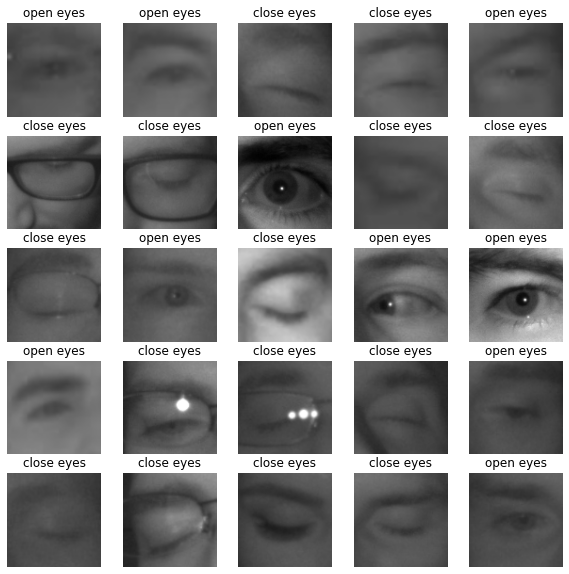

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Sample 25 images from dataset
indices = np.random.randint(0, len(all_data), size=25)
images = [all_data[i] for i in indices]
labels = [all_labels[i] for i in indices]

# Plot the 25 images
plt.figure(figsize=(10,10))
for i in range(len(indices)):
    plt.subplot(5, 5, i + 1)
    image = cv2.imread(images[i]) # Read image from disk #mpimg.imread
    image = cv2.resize(image,(100,100))
    plt.imshow(image)
    plt.title(labels[i])
    plt.axis('off')
    
plt.show()


_________________________________________________________________________
The Challenge here is that the images are grayscale (1 channel) since all the pre-trained models were trained on ImageNet dataset (which consists of RGB images). There are two options
 - One of the solutions is to repeat the image array 3 times to make it 3 channel.
 (by using a colored pre-trained VGG16 model and duplicate one channel to the three channels.)

- Train your VGG16 model on the ImageNet grayscaled dataset.

________________________________________________________________________

## Model 1 vgg 16:

In [ ]:
#6


from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

BATCH_SIZE = 64
HEIGHT = 100
WIDTH = 100
VAL_SPLIT = 0.2



# 1. Construct an instance of the `ImageDataGenerator` class
train_datagen =  ImageDataGenerator(
      preprocessing_function = tf.keras.applications.vgg16.preprocess_input,
      validation_split = VAL_SPLIT,
      rescale = 1.0/255,
      rotation_range = 20,
      brightness_range = [0.4 , 1.5 ],
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      vertical_flip = False, # Would vertical_flip = True be a good choice for data augmentation
    )

# 2. Retrieve the iterator
train_generator = train_datagen.flow_from_directory(TRAIN_DIR, 
                                                    shuffle = True,
                                                    seed = 7,
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

Found 65340 images belonging to 2 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    shuffle = True,
    seed = 7,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation')


Found 16335 images belonging to 2 classes.


In [ ]:
next(val_generator)[0].shape

(64, 100, 100, 3)

In [ ]:
# Do the same steps for the test set

# 1. Construct an instance of the `ImageDataGenerator` class
test_datagen =  ImageDataGenerator(
    preprocessing_function = tf.keras.applications.vgg16.preprocess_input
    )

# 2. Retrieve the iterator
test_generator = test_datagen.flow_from_directory(TEST_DIR, 
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical')

Found 3223 images belonging to 2 classes.


In [ ]:
from keras.applications.xception import Xception
from keras.applications.inception_v3 import InceptionV3
from keras.applications.mobilenet_v2  import MobileNetV2
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout

from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout

# Load model without classification head
base_model = VGG16(include_top = False,
                   weights = 'imagenet',
                   input_shape = (HEIGHT, WIDTH, 3))

# Print base model summary
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [ ]:
# Add new classifier layers
# Mark loaded layers as not trainable
for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.layers[-1].output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
output = Dense(2, activation='softmax')(x) # 30 classes 

# Define new model
model = Model(inputs = base_model.inputs, outputs = output)

# Print summary
model.summary()

# Compile
base_learning_rate = 0.0001
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = base_learning_rate),
            loss = 'binary_crossentropy',
            metrics = ['accuracy'])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0   

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


### Train the model

In [ ]:
import tensorflow as tf

INITIAL_EPOCHS = 15

history = model.fit(train_generator,
                    validation_data = val_generator,
                    epochs = INITIAL_EPOCHS)

Epoch 1/15
1021/1021 [==============================] - 308s 301ms/step - loss: 0.2155 - accuracy: 0.9113 - val_loss: 0.2250 - val_accuracy: 0.9002
Epoch 2/15
1021/1021 [==============================] - 288s 282ms/step - loss: 0.1582 - accuracy: 0.9367 - val_loss: 0.2007 - val_accuracy: 0.9180
Epoch 3/15
1021/1021 [==============================] - 289s 283ms/step - loss: 0.1464 - accuracy: 0.9434 - val_loss: 0.2018 - val_accuracy: 0.9272
Epoch 4/15
1021/1021 [==============================] - 290s 284ms/step - loss: 0.1387 - accuracy: 0.9466 - val_loss: 0.2412 - val_accuracy: 0.9169
Epoch 5/15
1021/1021 [==============================] - 289s 283ms/step - loss: 0.1332 - accuracy: 0.9498 - val_loss: 0.1963 - val_accuracy: 0.9305
Epoch 6/15
1021/1021 [==============================] - 288s 282ms/step - loss: 0.1277 - accuracy: 0.9511 - val_loss: 0.1919 - val_accuracy: 0.9314
Epoch 7/15
1021/1021 [==============================] - 288s 282ms/step - loss: 0.1241 - accuracy: 0.9533 - val_

In [ ]:
# model evaluate before fine tuning:
model.evaluate(test_generator)

51/51 [==============================] - 4s 85ms/step - loss: 10.4407 - accuracy: 0.8973


[10.440729141235352, 0.897300660610199]

In [ ]:
# Saving the Model 
model.save('mobile_grayyy.h5')

In [ ]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


In [ ]:
base_model.trainable = True

print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 15

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr = base_learning_rate/10),
            loss='binary_crossentropy',
            metrics=['accuracy'])


Number of layers in the base model:  19


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


### Tune the model

In [ ]:
for i, layer in enumerate(model.layers):
  print(i, layer.name, layer.trainable)
FINE_TUNE_EPOCHS = 5
TOTAL_EPOCHS = INITIAL_EPOCHS + FINE_TUNE_EPOCHS

0 input_3 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 flatten_2 True
20 dense_6 True
21 dropout_2 True
22 dense_7 True
23 dense_8 True


In [ ]:

history_fine = model.fit(train_generator,
                        validation_data = val_generator,
                        initial_epoch=history.epoch[-1], # specify the initial value of epoch to start from when training
                        epochs = TOTAL_EPOCHS)

Epoch 15/20
1021/1021 [==============================] - 292s 285ms/step - loss: 0.1008 - accuracy: 0.9632 - val_loss: 0.1654 - val_accuracy: 0.9546
Epoch 16/20
1021/1021 [==============================] - 287s 281ms/step - loss: 0.0803 - accuracy: 0.9714 - val_loss: 0.2577 - val_accuracy: 0.9325
Epoch 17/20
1021/1021 [==============================] - 287s 281ms/step - loss: 0.0715 - accuracy: 0.9752 - val_loss: 0.2495 - val_accuracy: 0.9389
Epoch 18/20
1021/1021 [==============================] - 287s 281ms/step - loss: 0.0654 - accuracy: 0.9773 - val_loss: 0.2314 - val_accuracy: 0.9409
Epoch 19/20
1021/1021 [==============================] - 288s 282ms/step - loss: 0.0627 - accuracy: 0.9787 - val_loss: 0.3292 - val_accuracy: 0.9351
Epoch 20/20
1021/1021 [==============================] - 287s 281ms/step - loss: 0.0600 - accuracy: 0.9800 - val_loss: 0.3618 - val_accuracy: 0.9381


In [ ]:
# model evaluate after fine tuning:
model.evaluate(test_generator)

51/51 [==============================] - 4s 69ms/step - loss: 75.6890 - accuracy: 0.9243


[75.68903350830078, 0.924294114112854]

## Model 2 MobileNet:

In [ ]:
#6


from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

BATCH_SIZE = 64
HEIGHT = 100
WIDTH = 100
VAL_SPLIT = 0.2



# 1. Construct an instance of the `ImageDataGenerator` class
train_datagen =  ImageDataGenerator(
      preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
      validation_split = VAL_SPLIT,
      rescale = 1.0/255,
      rotation_range = 20,
      brightness_range = [0.4 , 1.5 ],
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      vertical_flip = False, # Would vertical_flip = True be a good choice for data augmentation
    )

# 2. Retrieve the iterator
train_generator = train_datagen.flow_from_directory(TRAIN_DIR, 
                                                    shuffle = True,
                                                    seed = 7,
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

Found 65340 images belonging to 2 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    shuffle = True,
    seed = 7,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation')


Found 16335 images belonging to 2 classes.


In [ ]:
next(val_generator)[0].shape

(64, 100, 100, 3)

In [ ]:
# Do the same steps for the test set

# 1. Construct an instance of the `ImageDataGenerator` class
test_datagen =  ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
    )

# 2. Retrieve the iterator
test_generator = test_datagen.flow_from_directory(TEST_DIR, 
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical')

Found 3223 images belonging to 2 classes.


In [ ]:
from keras.applications.xception import Xception
from keras.applications.inception_v3 import InceptionV3
from keras.applications.mobilenet_v2  import MobileNetV2
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout

from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout

# Load model without classification head
base_model = MobileNetV2(include_top = False,
                   weights = 'imagenet',
                   input_shape = (HEIGHT, WIDTH, 3))

# Print base model summary
base_model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 50, 50, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 50, 50, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReL

In [ ]:
# Add new classifier layers
# Mark loaded layers as not trainable
for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.layers[-1].output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
output = Dense(2, activation='softmax')(x) # 30 classes 

# Define new model
model = Model(inputs = base_model.inputs, outputs = output)

# Print summary
model.summary()

# Compile
base_learning_rate = 0.0001
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = base_learning_rate),
            loss = 'binary_crossentropy',
            metrics = ['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 50, 50, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 50, 50, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 50, 50, 32)   0           ['bn_Conv1[0][0]']           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


### Train the model

In [ ]:
import tensorflow as tf

INITIAL_EPOCHS = 30

history = model.fit(train_generator,
                    validation_data = val_generator,
                    epochs = INITIAL_EPOCHS)

Epoch 1/30
1021/1021 [==============================] - 279s 259ms/step - loss: 0.6976 - accuracy: 0.5056 - val_loss: 0.6927 - val_accuracy: 0.5056
Epoch 2/30
1021/1021 [==============================] - 287s 281ms/step - loss: 0.6933 - accuracy: 0.4996 - val_loss: 0.6922 - val_accuracy: 0.5063
Epoch 3/30
1021/1021 [==============================] - 253s 247ms/step - loss: 0.6932 - accuracy: 0.5046 - val_loss: 0.6931 - val_accuracy: 0.5056
Epoch 4/30
1021/1021 [==============================] - 253s 247ms/step - loss: 0.6931 - accuracy: 0.5055 - val_loss: 0.6931 - val_accuracy: 0.5056
Epoch 5/30
1021/1021 [==============================] - 252s 247ms/step - loss: 0.6931 - accuracy: 0.5057 - val_loss: 0.6931 - val_accuracy: 0.5056
Epoch 6/30
1021/1021 [==============================] - 252s 247ms/step - loss: 0.6931 - accuracy: 0.5055 - val_loss: 0.6931 - val_accuracy: 0.5056
Epoch 7/30
1021/1021 [==============================] - 251s 246ms/step - loss: 0.6931 - accuracy: 0.5053 - val_

In [ ]:
# model evaluate before fine tuning:
model.evaluate(test_generator)

51/51 [==============================] - 2s 44ms/step - loss: 0.8470 - accuracy: 0.5141


[0.8470374345779419, 0.5141173005104065]

In [ ]:
# Saving the Model 
model.save('mobile_grayyy.h5')

### Tune the model

In [ ]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_4_expa

In [ ]:
base_model.trainable = True

print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 150

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr = base_learning_rate/10),
            loss='binary_crossentropy',
            metrics=['accuracy'])


Number of layers in the base model:  154


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
for i, layer in enumerate(model.layers):
  print(i, layer.name, layer.trainable)
FINE_TUNE_EPOCHS = 5
TOTAL_EPOCHS = INITIAL_EPOCHS + FINE_TUNE_EPOCHS

0 input_1 False
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_4_expa

In [ ]:

history_fine = model.fit(train_generator,
                        validation_data = val_generator,
                        initial_epoch=history.epoch[-1], # specify the initial value of epoch to start from when training
                        epochs = TOTAL_EPOCHS)

Epoch 15/20
1021/1021 [==============================] - 920s 897ms/step - loss: 0.5262 - accuracy: 0.7545 - val_loss: 0.6053 - val_accuracy: 0.6614
Epoch 16/20
1021/1021 [==============================] - 905s 886ms/step - loss: 0.3823 - accuracy: 0.8313 - val_loss: 0.4722 - val_accuracy: 0.7691
Epoch 17/20
1021/1021 [==============================] - 914s 895ms/step - loss: 0.3375 - accuracy: 0.8545 - val_loss: 0.4002 - val_accuracy: 0.8171
Epoch 18/20
1021/1021 [==============================] - 914s 895ms/step - loss: 0.3130 - accuracy: 0.8665 - val_loss: 0.3899 - val_accuracy: 0.8315
Epoch 19/20
1021/1021 [==============================] - 908s 889ms/step - loss: 0.3002 - accuracy: 0.8749 - val_loss: 0.3788 - val_accuracy: 0.8358
Epoch 20/20
1021/1021 [==============================] - 915s 896ms/step - loss: 0.2871 - accuracy: 0.8803 - val_loss: 0.3853 - val_accuracy: 0.8355


In [ ]:
# model evaluate after fine tuning:
model.evaluate(test_generator)

51/51 [==============================] - 22s 430ms/step - loss: 33.9313 - accuracy: 0.4859


[33.931331634521484, 0.4858827292919159]